<img src='img/logo.png' alt='Drawing' style='width:2000px;'/>

# <font color=blue>3. SDOF Systems</font>
<img src='https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20171213112855424-0593:9781316761403:fig2_21.png?pub-status=live' alt='Drawing' style='height:200px;'/>

## <font color=blue>3.1. Required Libraries</font>
Although only OpenSeesPy library is required to perform structural analysis we can make use of other libraries to perform other tasks. This is the nicest thing about Python!
<font color=red><div style="text-align: right"> **Documentation for**  
[**`openseespy`**](https://openseespydoc.readthedocs.io/en/latest/)  
[**`numpy`**](https://docs.scipy.org/doc/numpy/)  
[**`matplotlib.pyplot`**](https://matplotlib.org/api/pyplot_api.html)</div></font>

In [1]:
# import libraries 
# ------------------------------------------------------------------------
# A library to use OpenSees via Python
import openseespy.opensees as ops

# A library provides high-performance vector, matrix and higher-dimensional data structures for Python
import numpy as np 

# A Library to visualize data from Python
import matplotlib.pyplot as plt 

# A command required to print the figures on notebook
%matplotlib inline 

## <font color=blue>3.2. Unit Definitions</font>
We can use any units in definition of parameters as long as we properly define other unit measures. In our examples we will use meters (m) for displacements, kiloNewtons (kN) for forces, and seconds (sec) for time as basic unit definitions. In other words, the results obtained from OpenSeesPy will be in these units.

In [2]:
# Define units
# ------------------------------------------------------------------------
# Basic Units
m = 1.0
kN = 1.0
sec = 1.0

# Length
mm = m / 1000.0
cm = m / 100.0
inch = 25.4 * mm
ft = 12.0 * inch

# Force
N = kN / 1000.0
kips = kN * 4.448221615
lb = kips / 1.0e3

# Stress (kN/m2 or kPa)
Pa = N / (m ** 2)
kPa = Pa * 1.0e3
MPa = Pa * 1.0e6
GPa = Pa * 1.0e9
ksi = 6.8947573 * MPa
psi = 1e-3 * ksi

# Mass - Weight
tonne = kN * sec ** 2 / m
kg = N * sec ** 2 / m
lb = psi*inch**2

# Gravitational acceleration
g = 9.81*m/sec**2

# Time
min = 60*sec
hr = 60*min

## <font color=blue>3.3. Numerical Model of an Elastic Single Degree of Freedom (SDOF) System </font>
In this section, an elastic SDoF system is modelled using OpenSeesPy library. Various OpenSeesPy commands are introduced.
<font color=red><div style="text-align: right"> **Documentation for**    
[**`ops.wipe`**](https://openseespydoc.readthedocs.io/en/latest/src/wipe.html)
[**`ops.model`**](https://openseespydoc.readthedocs.io/en/latest/src/model.html)    
[**`ops.node`**](https://openseespydoc.readthedocs.io/en/latest/src/node.html)
[**`ops.mass`**](https://openseespydoc.readthedocs.io/en/latest/src/mass.html)
[**`ops.fix`**](https://openseespydoc.readthedocs.io/en/latest/src/fix.html)    
[**`ops.uniaxialMaterial`**](https://openseespydoc.readthedocs.io/en/latest/src/uniaxialMaterial.html)
[**`ops.element`**](https://openseespydoc.readthedocs.io/en/latest/src/element.html#)    
</div></font>

In [3]:
# Single degree of freedom (SDOF) system properties
# ------------------------------------------------------------------------
# Dynamic properties
mass = 1*tonne         # mass
T_n = 0.7*sec          # natural period
omega_n = 2*np.pi/T_n  # natural circular frequency

# Spring properties
k_el = mass*omega_n**2

# Dashpot properties
xi = 0.05             # damping ratio
omega_n = 2*np.pi/T_n # natural circular frequency
C = 2*xi*omega_n*mass # viscous damping coefficient
alpha = 1             # power factor (=1 means linear damping)

# Wipe any existing model
# ------------------------------------------------------------------------
ops.wipe()

# Create ModelBuilder (with 1-dimension and 1 DOF/node)
# ------------------------------------------------------------------------
ops.model('basic', '-ndm', 1, '-ndf', 1)

# Define nodes
# ------------------------------------------------------------------------
node1 = 1 # Tag for node 1 (fixed node)
node2 = 2 # Tag for node 2 (free node)
coord1 = 0.0 # 1 dimensional coordinate for node 1
coord2 = 0.0 # 1 dimensional coordinate for node 2
ops.node(node1, coord1)
ops.node(node2, coord2)

# Define single-point constraints
# ------------------------------------------------------------------------
ops.fix(node1, 1) # Fix node 1, 
ops.fix(node2, 0) # release node 2 (this is optional, by default it is unrestrained)

# Define the nodal mass
# ------------------------------------------------------------------------
ops.mass(node2, mass)

# Define materials
# ------------------------------------------------------------------------
# spring
spring_tag = 1  # tag for spring material
ops.uniaxialMaterial('Elastic', spring_tag, k_el)

# dashpot
dashpot_tag = 2 # tag for dashpot material
ops.uniaxialMaterial('Viscous', dashpot_tag, C, alpha)

# Define elements
# ------------------------------------------------------------------------
ops.element('zeroLength', spring_tag, node1, node2, "-mat", spring_tag, "-dir", 1)
ops.element('zeroLength', dashpot_tag, node1, node2, "-mat", dashpot_tag, "-dir", 1)

## <font color=blue>3.3.1. Dynamic Analysis </font>
In this section, the dynamic analysis is performed for the previously defined SDoF system. Various OpenSeesPy commands are introduced.
<font color=red><div style="text-align: right"> **Documentation for**     
[**`ops.timeSeries`**](https://openseespydoc.readthedocs.io/en/latest/src/timeSeries.html)
[**`ops.pattern`**](https://openseespydoc.readthedocs.io/en/latest/src/plainPattern.html)
[**`ops.wipeAnalysis`**](https://openseespydoc.readthedocs.io/en/latest/src/wipeAnalysis.html)  
[**`ops.test`**](https://openseespydoc.readthedocs.io/en/latest/src/test.html)
[**`ops.algorithm`**](https://openseespydoc.readthedocs.io/en/latest/src/algorithm.html)
[**`ops.numberer`**](https://openseespydoc.readthedocs.io/en/latest/src/numberer.html)
[**`ops.system`**](https://openseespydoc.readthedocs.io/en/latest/src/system.html)  
[**`ops.constraints`**](https://openseespydoc.readthedocs.io/en/latest/src/constraints.html)
[**`ops.integrator`**](https://openseespydoc.readthedocs.io/en/latest/src/integrator.html)
[**`ops.analysis`**](https://openseespydoc.readthedocs.io/en/latest/src/analysis.html)
[**`ops.analyze`**](https://openseespydoc.readthedocs.io/en/latest/src/analyze.html)  
[**`ops.nodeDisp`**](https://openseespydoc.readthedocs.io/en/latest/src/nodeDisp.html)
[**`ops.nodeVel`**](https://openseespydoc.readthedocs.io/en/latest/src/nnodeVel.html)
[**`ops.nodeAccel`**](https://openseespydoc.readthedocs.io/en/latest/src/nodeAccel.html)  
[**`ops.basicDeformation`**](https://openseespydoc.readthedocs.io/en/latest/src/basicDeformation.html)
[**`ops.basicForce`**](https://openseespydoc.readthedocs.io/en/latest/src/basicForce.html)
</div></font>



In [4]:
# Define the load pattern
# ------------------------------------------------------------------------
with open('Records//GMR_names.txt') as file:    # read the record names
    gm_names = [line.rstrip() for line in file]
dts = np.loadtxt('Records//GMR_dts.txt')        # load the time steps for records
gm_idx = 3                                      # index for record being applied
A_g = np.loadtxt('Records//'+gm_names[gm_idx])  # load the record file as an array
dt = dts[gm_idx]                                # time step of record
tsTag = 1                                       # tag for time series to use
pTag = 1                                        # tag for load pattern to use
ops.timeSeries('Path', tsTag, '-dt', dt, '-values', *A_g, '-factor', g) # time series object
ops.pattern('UniformExcitation', pTag, 1, '-accel', tsTag)              # pattern object

In [5]:
# Set analysis settings
# ------------------------------------------------------------------------
# Wipe any previous analysis object
ops.wipeAnalysis()

# Convergence Test -- determines when convergence has been achieved.
tol = 1.0e-8  # Set the tolerance (default)
iterMax = 50  # Set the max bumber of iterations (default)
pFlag = 0     # Optional print flag (default is 0). Valid options: 0-5
nType = 2     # optional type of norm (default is 2). Valid options: 0-2
ops.test('NormDispIncr', tol, iterMax, pFlag, nType)

# SolutionAlgorithm -- determines the sequence of steps taken to solve the non-linear equation at the current time step
ops.algorithm('Newton', '-initial')

# DOF_Numberer -- determines the mapping between equation numbers and degrees-of-freedom
ops.numberer('RCM')

# SystemOfEqn/Solver -- within the solution algorithm, it specifies how to store and solve the system of equations in the analysis
ops.system('BandGeneral')

# Constraints handler: determines how the constraint equations are enforced in the analysis -- how it handles the boundary conditions/imposed displacements
ops.constraints('Transformation')

# Integrator -- determines the predictive step for time t+dt
# About Newmark Integrator;
# gamma = 1/2, beta = 1/4 --> Average Acceleration Method; Unconditionally stable
# gamma = 1/2, beta = 1/6 --> Linear Acceleration Method; Conditionally stable: Dt / T > 0.551   
gamma = 0.5   # Set Newmark gamma coefficient
beta = 0.25   # Set Newmark beta coefficient
ops.integrator('Newmark', gamma, beta)

# AnalysisType -- defines what type of analysis is to be performed ('Static', 'Transient' etc.)
ops.analysis('Transient')

# Initialize some parameters
# ------------------------------------------------------------------------
analysis_time = (len(A_g) - 1) * dt
analysis_dt = 0.001
outputs = {
    "time": [0],
    "rel_disp": [0],
    "rel_accel": [0],
    "rel_vel": [0],
    "spring_force": [0],
    "dashpot_force": [0]
}

# Perform step by step analysis
# ------------------------------------------------------------------------
while ops.getTime() < analysis_time:
    curr_time = ops.getTime()
    ops.analyze(1, analysis_dt)

    # Save outputs, you can use but you do not need recorders!
    outputs["time"].append(curr_time)
    outputs["rel_disp"].append(ops.nodeDisp(node2, 1))
    outputs["rel_vel"].append(ops.nodeVel(node2, 1))
    outputs["rel_accel"].append(ops.nodeAccel(node2, 1))
    outputs["spring_force"].append(ops.basicForce(spring_tag)[0])
    outputs["dashpot_force"].append(ops.basicForce(dashpot_tag)[0])

# convert lists to array
for item in outputs:
    outputs[item] = np.array(outputs[item])

# Check for equality: left-hand side (LHS) of the equation of motion
outputs["LHS"]=np.array(outputs["rel_accel"])*mass + np.array(outputs["spring_force"])+np.array(outputs["dashpot_force"])
# Check for equality: right-hand side (RHS) of the equation of motion
inputs = {"RHS": -A_g*g*mass/tonne, "time": np.arange(0,len(A_g)*dt,dt)}

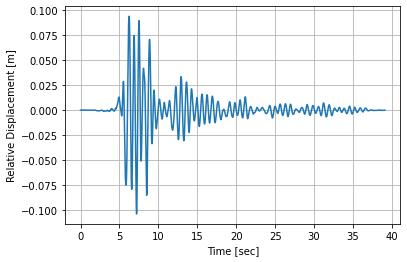

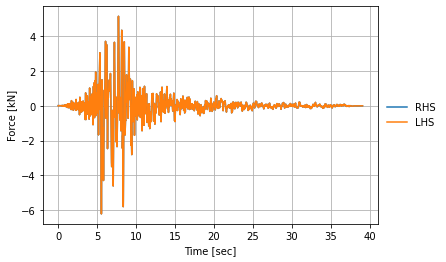

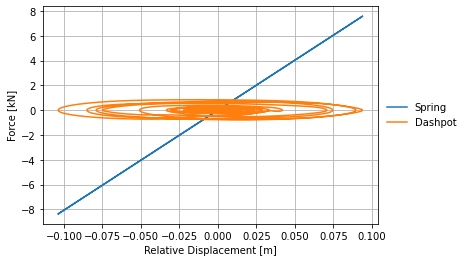

In [6]:
# Plot the results
# ------------------------------------------------------------------------
plt.figure()
plt.plot(outputs["time"], outputs["rel_disp"])
plt.xlabel('Time [sec]')
plt.ylabel('Relative Displacement [m]')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(inputs["time"], inputs["RHS"], label = 'RHS')
plt.plot(outputs["time"], outputs["LHS"], label = 'LHS')
plt.xlabel('Time [sec]')
plt.ylabel('Force [kN]')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

plt.figure()
plt.plot(outputs["rel_disp"], outputs["spring_force"], label='Spring')
plt.plot(outputs["rel_disp"], outputs["dashpot_force"], label='Dashpot')
plt.xlabel('Relative Displacement [m]')
plt.ylabel('Force [kN]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.grid(True)
plt.show()

In [7]:
ops.eigen('-fullGenLapack' ,1)

[80.56819919256618]

## <font color=blue>3.4. Uniaxial Material Testing via Static Analysis</font>
OpenSees have various number of *uniaxial* materials. These materials can be tested via displacement controlled static analysis. As an example, three different materials are going to be tested.

- [Elastic](https://openseespydoc.readthedocs.io/en/latest/src/ElasticUni.html) (Materal1): Is a  elastic uniaxial material.

- [ElasticPP](https://openseespydoc.readthedocs.io/en/latest/src/ElasticPP.html) (Materal2): Is a  elastic perfectly-plastic uniaxial material.

- [Steel01](https://openseespydoc.readthedocs.io/en/latest/src/steel01.html) (Materal3): Is a  bilinear steel material with kinematic hardening and optional isotropic hardening described by a non-linear evolution equation.

### <font color=blue>3.4.1 Motonic Loading Test</font>

In [8]:
def monotonic_test(dref, nSteps, Material):
    """
    Run monotonic loading test on a uniaxial material
    Args:
        Material:    List containg, Material properties
        dref:        Reference displacement to which cycles are run
        nSteps:      Number of displacement increments
    Returns:
        Deformation: List containing deformation of material thoughout the analysis
        Forces:      List containing forces in material throughout the analysis
    """
    
    # Wipe any existing model
    # ------------------------------------------------------------------------
    ops.wipe()

    # Create ModelBuilder (with 1-dimension and 1 DOF/node)
    # ------------------------------------------------------------------------
    ops.model('basic', '-ndm', 1, '-ndf', 1)

    # Define nodes
    # ------------------------------------------------------------------------
    node1 = 1 # Tag for node 1 (fixed node)
    node2 = 2 # Tag for node 2 (free node)
    coord1 = 0.0 # 1 dimensional coordinate for node 1
    coord2 = 0.0 # 1 dimensional coordinate for node 2
    ops.node(node1, coord1)
    ops.node(node2, coord2)

    # Define single-point constraints
    # ------------------------------------------------------------------------
    ops.fix(node1, 1) # Fix node 1, 
    ops.fix(node2, 0) # release node 2 (this is optional, by default it is unrestrained)

    # Define the nodal mass
    # ------------------------------------------------------------------------
    ops.mass(node2, mass)

    # Define materials
    # ------------------------------------------------------------------------
    # spring
    spring_tag = 1
    spring_type = Material[0]
    spring_props = Material[1:]
    ops.uniaxialMaterial(spring_type, spring_tag, *spring_props)
    
    # low stiffness material (for numerical purposes)
    dummy_tag = 2 # tag for low stiffness material
    ops.uniaxialMaterial('Elastic', dummy_tag, 1e-5)
    
    # Define elements
    # ------------------------------------------------------------------------
    ops.element('zeroLength', spring_tag, node1, node2, "-mat", spring_tag, "-dir", 1)
    ops.element('zeroLength', dummy_tag, node1, node2, "-mat", dummy_tag, "-dir", 1)

    # Define the load pattern
    # ------------------------------------------------------------------------
    ops.timeSeries('Linear', 1)
    ops.pattern('Plain', 1, 1)
    ops.load(2, 1)

    # Set analysis settings
    # ------------------------------------------------------------------------
    # Wipe any previous analysis object
    ops.wipeAnalysis()

    # Convergence Test -- determines when convergence has been achieved.
    tol = 1.0e-8  # Set the tolerance (default)
    iterMax = 50  # Set the max bumber of iterations (default)
    pFlag = 0     # Optional print flag (default is 0). Valid options: 0-5
    nType = 2     # optional type of norm (default is 2). Valid options: 0-2
    ops.test('NormDispIncr', tol, iterMax, pFlag, nType)

    # SolutionAlgorithm -- determines the sequence of steps taken to solve the non-linear equation at the current time step
    ops.algorithm('Newton', '-initial')

    # DOF_Numberer -- determines the mapping between equation numbers and degrees-of-freedom
    ops.numberer('RCM')

    # SystemOfEqn/Solver -- within the solution algorithm, it specifies how to store and solve the system of equations in the analysis
    ops.system('BandGeneral')

    # Constraints handler: determines how the constraint equations are enforced in the analysis -- how it handles the boundary conditions/imposed displacements
    ops.constraints('Transformation')
    
    # Integrator -- determines the predictive step for time t+dt
    dU = dref/nSteps # displacement increment
    ops.integrator('DisplacementControl', 2, 1, dU)

    # AnalysisType -- defines what type of analysis is to be performed ('Static', 'Transient' etc.)
    ops.analysis('Static')

    # Initialize some parameters
    # ------------------------------------------------------------------------
    Force = [0]
    Deformation = [0]
    
    # Perform step by step analysis
    # ------------------------------------------------------------------------
    for l in range(0,nSteps,1):
        ok = ops.analyze(1)
        Force.append(ops.basicForce(spring_tag)[0])
        Deformation.append(ops.basicDeformation(spring_tag)[0])
        if ok !=0:
            print("DispControl Analysis is FAILED")
            print("Analysis failed at nSteps: %s" %(l))
            print('-------------------------------------------------------------------------')
            break
    return [Deformation,Force]

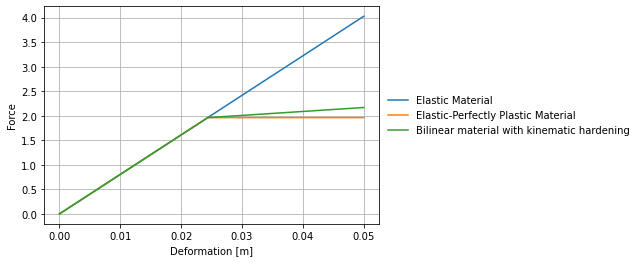

In [9]:
# Material properties
# ------------------------------------------------------------------------
eta = 0.2        # strength factor, reduce this to make it nonlinear
F_y = eta*mass*g # Yield strength
u_y = F_y/k_el   # yield displacement
r_post = 0.1     # strain-hardening ratio (ratio between post-yield tangent and initial elastic tangent)
Material1 = ['Elastic', k_el] # Elastic
Material2 = ['ElasticPP', k_el, u_y] # Elastic-Perfectly Plastic
Material3 = ['Steel01', F_y, k_el, r_post] # Bilinear with kinematic hardening

# Perform the analyses
# ------------------------------------------------------------------------
dref = 5*cm      # maximum displacement to run the analysis
nSteps = 2000    # number of steps to run the the analysis
outputs1 = monotonic_test(dref, nSteps, Material1)
outputs2 = monotonic_test(dref, nSteps, Material2)
outputs3 = monotonic_test(dref, nSteps, Material3)

# Plot the results
# ------------------------------------------------------------------------
plt.figure()
plt.plot(outputs1[0], outputs1[1], label='Elastic Material')
plt.plot(outputs2[0], outputs2[1], label='Elastic-Perfectly Plastic Material')
plt.plot(outputs3[0], outputs3[1], label='Bilinear material with kinematic hardening')
plt.xlabel('Deformation [m]')
plt.ylabel('Force')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.grid(True)
plt.show()

### <font color=blue>3.4.2 Cyclic Loading Test</font>

In [10]:
def cyclic_test(dref, numCycles, nSteps, Material):
    """
    Run cyclic loading test on a uniaxial material
    Args:
        Material:    List containg, Material properties
        dref:        Reference displacement to which cycles are run.
        numCycles:   No. of cycles. Valid options either 1,2,3,4,5,6
        nSteps:      Number of displacement increments per load reversal
    Returns:
        Deformation: List containing deformation of material thoughout the analysis
        Forces:      List containing forces in material throughout the analysis
    """
    
    # Wipe any existing model
    # ------------------------------------------------------------------------
    ops.wipe()

    # Create ModelBuilder (with 1-dimension and 1 DOF/node)
    # ------------------------------------------------------------------------
    ops.model('basic', '-ndm', 1, '-ndf', 1)

    # Define nodes
    # ------------------------------------------------------------------------
    node1 = 1 # Tag for node 1 (fixed node)
    node2 = 2 # Tag for node 2 (free node)
    coord1 = 0.0 # 1 dimensional coordinate for node 1
    coord2 = 0.0 # 1 dimensional coordinate for node 2
    ops.node(node1, coord1)
    ops.node(node2, coord2)

    # Define single-point constraints
    # ------------------------------------------------------------------------
    ops.fix(node1, 1) # Fix node 1, 
    ops.fix(node2, 0) # release node 2 (this is optional, by default it is unrestrained)

    # Define the nodal mass
    # ------------------------------------------------------------------------
    ops.mass(node2, mass)

    # Define materials
    # ------------------------------------------------------------------------
    # spring
    spring_tag = 1
    spring_type = Material[0]
    spring_props = Material[1:]
    ops.uniaxialMaterial(spring_type, spring_tag, *spring_props)
    
    # low stiffness material (for numerical purposes)
    dummy_tag = 2 # tag for low stiffness material
    ops.uniaxialMaterial('Elastic', dummy_tag, 1e-5)
    
    # Define elements
    # ------------------------------------------------------------------------
    ops.element('zeroLength', spring_tag, node1, node2, "-mat", spring_tag, "-dir", 1)
    ops.element('zeroLength', dummy_tag, node1, node2, "-mat", dummy_tag, "-dir", 1)

    # Define the load pattern
    # ------------------------------------------------------------------------
    ops.timeSeries('Linear', 1)
    ops.pattern('Plain', 1, 1)
    ops.load(2, 1)

    # Initialize some parameters
    # ------------------------------------------------------------------------
    Force = [0]
    Deformation = [0]
    
    # Set analysis settings
    # ------------------------------------------------------------------------
    # Wipe any previous analysis object
    ops.wipeAnalysis()

    # Convergence Test -- determines when convergence has been achieved.
    tol = 1.0e-8  # Set the tolerance (default)
    iterMax = 50  # Set the max bumber of iterations (default)
    pFlag = 0     # Optional print flag (default is 0). Valid options: 0-5
    nType = 2     # optional type of norm (default is 2). Valid options: 0-2
    ops.test('NormDispIncr', tol, iterMax, pFlag, nType)

    # SolutionAlgorithm -- determines the sequence of steps taken to solve the non-linear equation at the current time step
    ops.algorithm('Newton', '-initial')

    # DOF_Numberer -- determines the mapping between equation numbers and degrees-of-freedom
    ops.numberer('RCM')

    # SystemOfEqn/Solver -- within the solution algorithm, it specifies how to store and solve the system of equations in the analysis
    ops.system('BandGeneral')

    # Constraints handler: determines how the constraint equations are enforced in the analysis -- how it handles the boundary conditions/imposed displacements
    ops.constraints('Transformation')
    
    # Create the list of displacements
    if numCycles == 1:
        dispList = [dref, -2*dref, dref]
        dispNoMax = 3
    elif numCycles == 2:
        dispList = [dref, -2*dref, dref,
                    dref, -2*dref, dref]
        dispNoMax = 6
    elif numCycles == 3:
        dispList = [dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref]
        dispNoMax = 9
    elif numCycles == 4:
        dispList = [dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref]
        dispNoMax = 12
    elif numCycles == 5:
        dispList = [dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref]
        dispNoMax = 15
    elif numCycles == 6:
        dispList = [dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    dref, -2*dref, dref,
                    ddref, -2*dref, dref,
                    dref, -2*dref, dref]
        dispNoMax = 18
    else:
        print("ERROR: Value for numCycles not a valid choice. Choose between 1 and 6")
        print('-------------------------------------------------------------------------') 
    
    # Iterate for each load reversal
    for d in range(1,dispNoMax+1,1):
        
        # Integrator -- determines the predictive step for time t+dt
        dU = dispList[d-1]/nSteps # displacement increment
        ops.integrator('DisplacementControl', 2, 1, dU)

        # AnalysisType -- defines what type of analysis is to be performed ('Static', 'Transient' etc.)
        ops.analysis('Static')
        
        # Perform step by step analysis
        # ------------------------------------------------------------------------
        for l in range(0,nSteps,1):
            ok = ops.analyze(1)
            Force.append(ops.basicForce(spring_tag)[0])
            Deformation.append(ops.basicDeformation(spring_tag)[0])
            if ok !=0:
                print("DispControl Analysis is FAILED")
                print("Analysis failed at cycle: %s and nSteps: %s" %(d,l))
                print('-------------------------------------------------------------------------')
                break
        
    return [Deformation,Force]

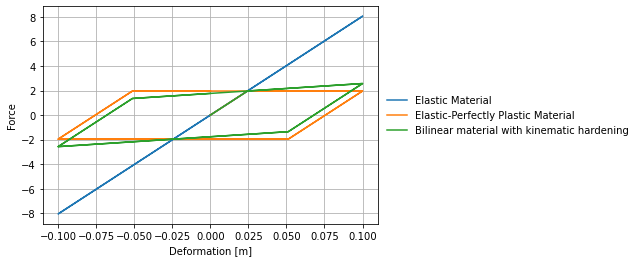

In [11]:
# Perform the analyses
# ------------------------------------------------------------------------
dref = 10*cm
numCycles = 2
nSteps = 1000
outputs1 = cyclic_test(dref, numCycles, nSteps, Material1)
outputs2 = cyclic_test(dref, numCycles, nSteps, Material2)
outputs3 = cyclic_test(dref, numCycles, nSteps, Material3)

# Plot the results
# ------------------------------------------------------------------------
plt.figure()
plt.plot(outputs1[0], outputs1[1], label='Elastic Material')
plt.plot(outputs2[0], outputs2[1], label='Elastic-Perfectly Plastic Material')
plt.plot(outputs3[0], outputs3[1], label='Bilinear material with kinematic hardening')
plt.xlabel('Deformation [m]')
plt.ylabel('Force')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.grid(True)
plt.show()

## <font color=blue>3.5. Dynamic Analysis of Various SDOF Systems</font>
Instead of performing single dynamic analysis, a parametric analysis can be performed on various SDOF systems. For example, different inputs (signals, material properties etc.)

In [12]:
def sdof_response(mass, motion, dt, Material, C, alpha = 1):
    """
    Run seismic analysis of a nonlinear SDOF

    :param mass: SDOF mass
    :param motion: list, acceleration values
    :param dt: float, time step of acceleration values
    :param xi: damping ratio
    :param Material: list containg, Material properties
    :return:
    """
    
    # Wipe any existing model
    # ------------------------------------------------------------------------
    ops.wipe()

    # Create ModelBuilder (with 1-dimension and 1 DOF/node)
    # ------------------------------------------------------------------------
    ops.model('basic', '-ndm', 1, '-ndf', 1)

    # Define nodes
    # ------------------------------------------------------------------------
    node1 = 1 # Tag for node 1 (fixed node)
    node2 = 2 # Tag for node 2 (free node)
    coord1 = 0.0 # 1 dimensional coordinate for node 1
    coord2 = 0.0 # 1 dimensional coordinate for node 2
    ops.node(node1, coord1)
    ops.node(node2, coord2)

    # Define single-point constraints
    # ------------------------------------------------------------------------
    ops.fix(node1, 1) # Fix node 1, 
    ops.fix(node2, 0) # release node 2 (this is optional, by default it is unrestrained)

    # Define the nodal mass
    # ------------------------------------------------------------------------
    ops.mass(node2, mass)

    # Define materials
    # ------------------------------------------------------------------------
    # spring
    spring_tag = 1
    spring_type = Material[0]
    spring_props = Material[1:]
    ops.uniaxialMaterial(spring_type, spring_tag, *spring_props)

    # dashpot
    dashpot_tag = 2 # tag for dashpot material
    ops.uniaxialMaterial('Viscous', dashpot_tag, C, alpha)

    # Define elements
    # ------------------------------------------------------------------------
    ops.element('zeroLength', spring_tag, node1, node2, "-mat", spring_tag, "-dir", 1)
    ops.element('zeroLength', dashpot_tag, node1, node2, "-mat", dashpot_tag, "-dir", 1)    
    
    # Define the load pattern
    # ------------------------------------------------------------------------
    tsTag = 1                                       # tag for time series to use
    pTag = 1                                        # tag for load pattern to use
    values = list(-1 * A_g)                         # should be negative
    ops.timeSeries('Path', tsTag, '-dt', dt, '-values', *A_g, '-factor', g) # time series object
    ops.pattern('UniformExcitation', pTag, 1, '-accel', tsTag)              # pattern object

    # Set analysis settings
    # ------------------------------------------------------------------------
    # Wipe any previous analysis object
    ops.wipeAnalysis()

    # Convergence Test -- determines when convergence has been achieved.
    tol = 1.0e-8  # Set the tolerance (default)
    iterMax = 50  # Set the max bumber of iterations (default)
    pFlag = 0     # Optional print flag (default is 0). Valid options: 0-5
    nType = 2     # optional type of norm (default is 2). Valid options: 0-2
    ops.test('NormDispIncr', tol, iterMax, pFlag, nType)

    # SolutionAlgorithm -- determines the sequence of steps taken to solve the non-linear equation at the current time step
    ops.algorithm('Newton', '-initial')

    # DOF_Numberer -- determines the mapping between equation numbers and degrees-of-freedom
    ops.numberer('RCM')

    # SystemOfEqn/Solver -- within the solution algorithm, it specifies how to store and solve the system of equations in the analysis
    ops.system('BandGeneral')

    # Constraints handler: determines how the constraint equations are enforced in the analysis -- how it handles the boundary conditions/imposed displacements
    ops.constraints('Transformation')

    # Integrator -- determines the predictive step for time t+dt
    # About Newmark Integrator;
    # gamma = 1/2, beta = 1/4 --> Average Acceleration Method; Unconditionally stable
    # gamma = 1/2, beta = 1/6 --> Linear Acceleration Method; Conditionally stable: Dt / T > 0.551   
    gamma = 0.5   # Set Newmark gamma coefficient
    beta = 0.25   # Set Newmark beta coefficient
    ops.integrator('Newmark', gamma, beta)

    # AnalysisType -- defines what type of analysis is to be performed ('Static', 'Transient' etc.)
    ops.analysis('Transient')
    
    # Initialize some parameters
    # ------------------------------------------------------------------------
    analysis_time = (len(values) - 1) * dt
    analysis_dt = 0.001
    outputs = {
        "time": [0],
        "rel_disp": [0],
        "rel_accel": [0],
        "rel_vel": [0],
        "spring_force": [0],
        "dashpot_force": [0]
    }

    # Perform step by step analysis
    # ------------------------------------------------------------------------
    while ops.getTime() < analysis_time:
        curr_time = ops.getTime()
        ops.analyze(1, analysis_dt)

        # Save outputs, you can use but you do not need recorders!
        outputs["time"].append(curr_time)
        outputs["rel_disp"].append(ops.nodeDisp(node2, 1))
        outputs["rel_vel"].append(ops.nodeVel(node2, 1))
        outputs["rel_accel"].append(ops.nodeAccel(node2, 1))
        outputs["spring_force"].append(ops.basicForce(spring_tag)[0])
        outputs["dashpot_force"].append(ops.basicForce(dashpot_tag)[0])
        
    for item in outputs:
        outputs[item] = np.array(outputs[item])

    return outputs

In [13]:
# Perform sequential dynamic analyses for 3 models
# ------------------------------------------------------------------------
for idx in range(len(gm_names)): # lgo through all the records
    A_g = -np.loadtxt('Records//'+gm_names[idx]) # record (g)
    dt = dts[idx]                                # time step of record (sec)
    outputs1 = sdof_response(mass, A_g, dt, Material1, C, alpha = 1)
    outputs2 = sdof_response(mass, A_g, dt, Material2, C, alpha = 1)
    outputs3 = sdof_response(mass, A_g, dt, Material3, C, alpha = 1)
    acc1 = np.max(outputs1["rel_accel"]); vel1 = np.max(outputs1["rel_vel"]); disp1 = np.max(outputs1["rel_disp"]);
    acc2 = np.max(outputs2["rel_accel"]); vel2 = np.max(outputs2["rel_vel"]); disp2 = np.max(outputs2["rel_disp"]);
    acc3 = np.max(outputs3["rel_accel"]); vel3 = np.max(outputs3["rel_vel"]); disp3 = np.max(outputs3["rel_disp"]);

    print('Ground Motion Record File: %s' %gm_names[idx])
    print('Peak Accelerations (g) \nModel 1: %.3f\nModel 2: %.3f\nModel 3: %.3f' % (acc1/g, acc2/g, acc3/g))
    print('Peak Velocities (m/s) \nModel 1: %.3f\nModel 2: %.3f\nModel 3: %.3f' % (vel1, vel2, vel3))
    print('Peak Displacements (m) \nModel 1: %.3f\nModel 2: %.3f\nModel 3: %.3f' % (disp1, disp2, disp3))
    print('------------------------------------------------------------------------')

Ground Motion Record File: RSN174_IMPVALL.H_H-E11140_SF_1.316.txt
Peak Accelerations (g) 
Model 1: 0.647
Model 2: 0.532
Model 3: 0.558
Peak Velocities (m/s) 
Model 1: 0.561
Model 2: 0.375
Model 3: 0.402
Peak Displacements (m) 
Model 1: 0.052
Model 2: 0.026
Model 3: 0.026
------------------------------------------------------------------------
Ground Motion Record File: RSN5829_SIERRA.MEX_RII000_SF_1.316.txt
Peak Accelerations (g) 
Model 1: 0.856
Model 2: 0.702
Model 3: 0.724
Peak Velocities (m/s) 
Model 1: 0.729
Model 2: 0.510
Model 3: 0.537
Peak Displacements (m) 
Model 1: 0.089
Model 2: 0.121
Model 3: 0.088
------------------------------------------------------------------------
Ground Motion Record File: RSN8119_CCHURCH_PRPCW_SF_1.316.txt
Peak Accelerations (g) 
Model 1: 1.259
Model 2: 0.781
Model 3: 0.796
Peak Velocities (m/s) 
Model 1: 1.255
Model 2: 0.853
Model 3: 0.934
Peak Displacements (m) 
Model 1: 0.155
Model 2: 0.119
Model 3: 0.225
------------------------------------------

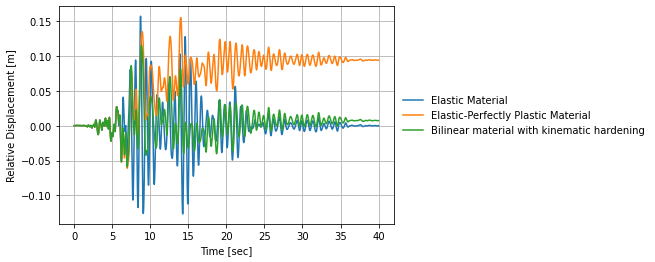

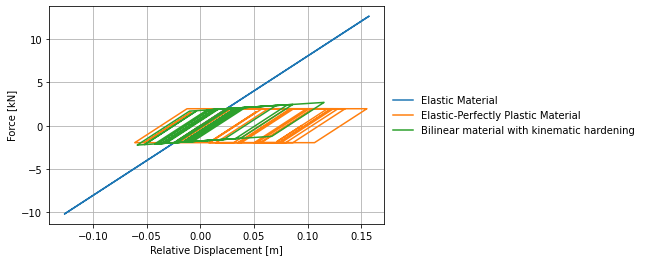

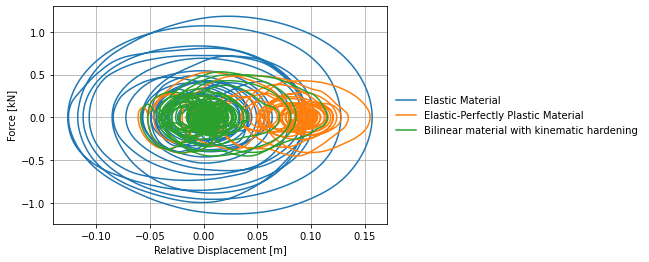

In [14]:
# Plot the results from the final analyses
# ------------------------------------------------------------------------
plt.figure()
plt.plot(outputs1["time"], outputs1["rel_disp"], label='Elastic Material')
plt.plot(outputs2["time"], outputs2["rel_disp"], label='Elastic-Perfectly Plastic Material')
plt.plot(outputs3["time"], outputs3["rel_disp"], label='Bilinear material with kinematic hardening')
plt.xlabel('Time [sec]')
plt.ylabel('Relative Displacement [m]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.grid(True)
plt.show()

plt.figure()
plt.plot(outputs1["rel_disp"], outputs1["spring_force"], label='Elastic Material')
plt.plot(outputs2["rel_disp"], outputs2["spring_force"], label='Elastic-Perfectly Plastic Material')
plt.plot(outputs3["rel_disp"], outputs3["spring_force"], label='Bilinear material with kinematic hardening')
plt.xlabel('Relative Displacement [m]')
plt.ylabel('Force [kN]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.grid(True)
plt.show()

plt.figure()
plt.plot(outputs1["rel_disp"], outputs1["dashpot_force"], label='Elastic Material')
plt.plot(outputs2["rel_disp"], outputs2["dashpot_force"], label='Elastic-Perfectly Plastic Material')
plt.plot(outputs3["rel_disp"], outputs3["dashpot_force"], label='Bilinear material with kinematic hardening')
plt.xlabel('Relative Displacement [m]')
plt.ylabel('Force [kN]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.grid(True)
plt.show()

[Back to 2. Python for Beginners](./2.%20Python.ipynb)

[Jump to 4. 2D Frame Systems](./4.%20Frame.ipynb)